# Note that all error plots are actually completely wrong with their minimum values, probably should be box plots anyway

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm

In [2]:
num_particles = 1000

# np.random.seed(0)

particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

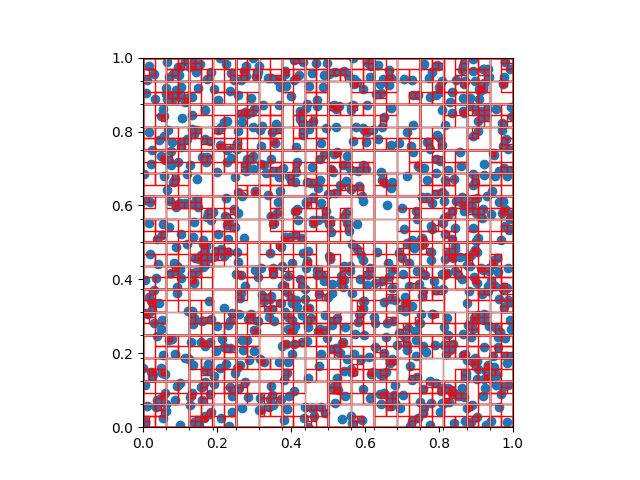

In [3]:
bh_tree_print = bh.BH(particles, 0.5)
bh_tree_print.root.create_tree()
bh_tree_print.plot(fmm_grid=True)

In [4]:
general.pairwise.potentials(particles, zero_potentials=True)
dir_pots = np.array([particle.direct_potential for particle in particles])

# `terms`

In [5]:
theta = 0.5
termss = np.arange(0,10)
n_crit = 2

bh_errs = []
bh_fracs = []

for terms in termss:
    print(f'Terms: {terms}')
    bh_method = bh.BH(particles, theta, terms, n_crit)
    bh_method.do_bh(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    bh_errs.append(err)
    frac = np.abs(err / dir_pots)
    bh_fracs.append(frac)

Terms: 0
Terms: 1
Terms: 2
Terms: 3
Terms: 4
Terms: 5
Terms: 6
Terms: 7
Terms: 8
Terms: 9


In [6]:
fmm_errs = []
fmm_fracs = []

for terms in termss[1:]:
    print(f'Terms: {terms}')
    fmm_method = fmm.FMM(particles, terms)
    fmm_method.do_fmm(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    fmm_errs.append(err)
    frac = np.abs(err / dir_pots)
    fmm_fracs.append(frac)

Terms: 1
Terms: 2
Terms: 3
Terms: 4
Terms: 5
Terms: 6
Terms: 7
Terms: 8
Terms: 9


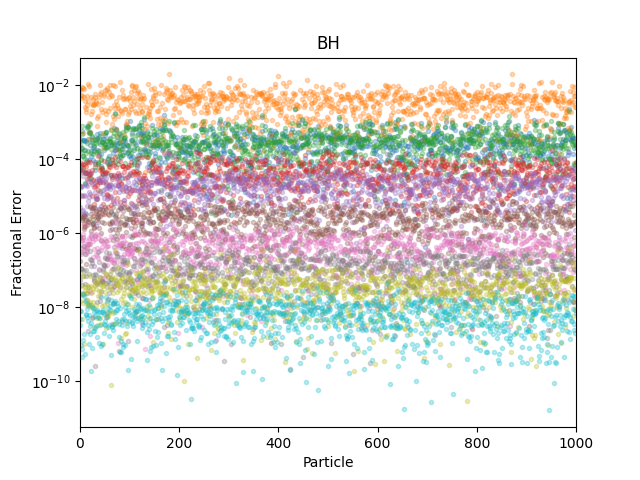

In [7]:
fig, ax = plt.subplots()
for i, terms in enumerate(termss):
    ax.plot(bh_fracs[i], '.', alpha = 0.3, label=str(terms))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.set_title('BH')

plt.show()

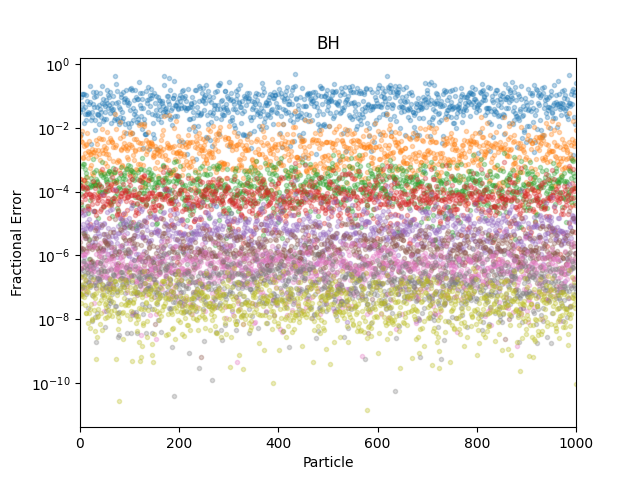

In [8]:
fig, ax = plt.subplots()
for i, terms in enumerate(termss[1:]):
    ax.plot(fmm_fracs[i], '.', alpha = 0.3, label=str(terms))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.set_title('BH')

plt.show()

In [9]:
bh_averages = [np.average(frac) for frac in bh_fracs]
bh_stdevs = [np.std(frac) for frac in bh_fracs]
bh_mins = [np.min(frac) for frac in bh_fracs]
bh_maxs = [np.max(frac) for frac in bh_fracs]

fmm_averages = [np.average(frac) for frac in fmm_fracs]
fmm_stdevs = [np.std(frac) for frac in fmm_fracs]
fmm_mins = [np.min(frac) for frac in fmm_fracs]
fmm_maxs = [np.max(frac) for frac in fmm_fracs]

In [17]:
fmm_mins, fmm_averages

([3.4817377044596746e-05,
  3.320562096920162e-07,
  4.3753916501808995e-07,
  4.450039492941591e-08,
  7.981986162668039e-09,
  6.344700743708189e-10,
  4.591590861921846e-10,
  3.986873945353258e-11,
  1.3727942620896153e-11],
 [0.07005579453945361,
  0.0027443224898052055,
  0.00020908656190657589,
  8.818353272303836e-05,
  9.371216810696921e-06,
  1.965990655013871e-06,
  5.241055201221503e-07,
  1.9512261375840722e-07,
  5.040841299830008e-08])

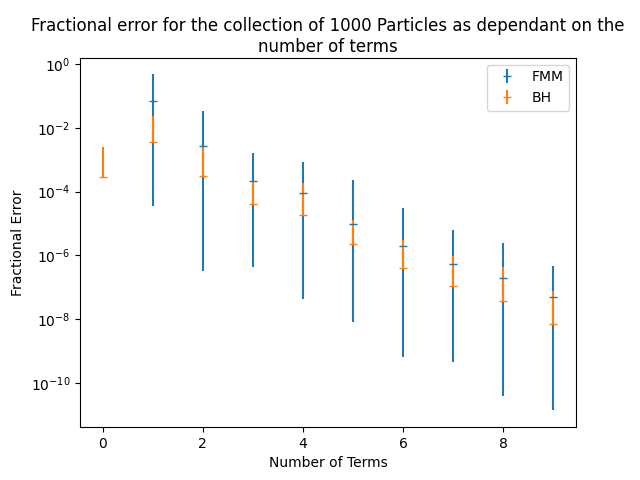

In [27]:
fig, ax = plt.subplots()

ax.set_title(f'Fractional error for the collection of {num_particles} Particles as dependant on the number of terms', wrap=True)


ax.errorbar(termss[1:], fmm_averages, (np.subtract(fmm_averages, fmm_mins), np.subtract(fmm_maxs, fmm_averages)), fmt='_', label='FMM')
ax.errorbar(termss, bh_averages, (bh_mins, bh_maxs), fmt='_', label='BH')

ax.set_yscale('log')

# integer_ticks = np.linspace(termss[0], termss[-1], 8, endpoint=True, dtype=int)
# ax.set_xticks(integer_ticks)

ax.set_xlabel('Number of Terms')
ax.set_ylabel('Fractional Error')

ax.legend()

plt.show()

# $\theta$

In [11]:
thetas = np.linspace(0, 0.6, 20)
terms = 0
n_crit = 2

com_errs = []
com_fracs = []

for theta in thetas:
    print(f'Theta: {theta}')
    bh_method = bh.BH(particles, theta, terms, n_crit)
    bh_method.do_bh(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    com_errs.append(err)
    frac = np.abs(err / dir_pots)
    com_fracs.append(frac)

Theta: 0.0
Theta: 0.031578947368421054
Theta: 0.06315789473684211
Theta: 0.09473684210526316
Theta: 0.12631578947368421
Theta: 0.15789473684210525
Theta: 0.18947368421052632
Theta: 0.2210526315789474
Theta: 0.25263157894736843
Theta: 0.28421052631578947
Theta: 0.3157894736842105
Theta: 0.3473684210526316
Theta: 0.37894736842105264
Theta: 0.4105263157894737
Theta: 0.4421052631578948
Theta: 0.4736842105263158
Theta: 0.5052631578947369
Theta: 0.5368421052631579
Theta: 0.5684210526315789
Theta: 0.6


In [12]:
thetas = np.linspace(0, 0.6, 20)
terms = 2
n_crit = 2

multi_errs = []
multi_fracs = []

for theta in thetas:
    print(f'Theta: {theta}')
    bh_method = bh.BH(particles, theta, terms, n_crit)
    bh_method.do_bh(zero_potentials=True)
    pots = np.array([particle.potential for particle in particles])
    err = pots - dir_pots
    multi_errs.append(err)
    frac = np.abs(err / dir_pots)
    multi_fracs.append(frac)

Theta: 0.0
Theta: 0.031578947368421054
Theta: 0.06315789473684211
Theta: 0.09473684210526316
Theta: 0.12631578947368421
Theta: 0.15789473684210525
Theta: 0.18947368421052632
Theta: 0.2210526315789474
Theta: 0.25263157894736843
Theta: 0.28421052631578947
Theta: 0.3157894736842105
Theta: 0.3473684210526316
Theta: 0.37894736842105264
Theta: 0.4105263157894737
Theta: 0.4421052631578948
Theta: 0.4736842105263158
Theta: 0.5052631578947369
Theta: 0.5368421052631579
Theta: 0.5684210526315789
Theta: 0.6


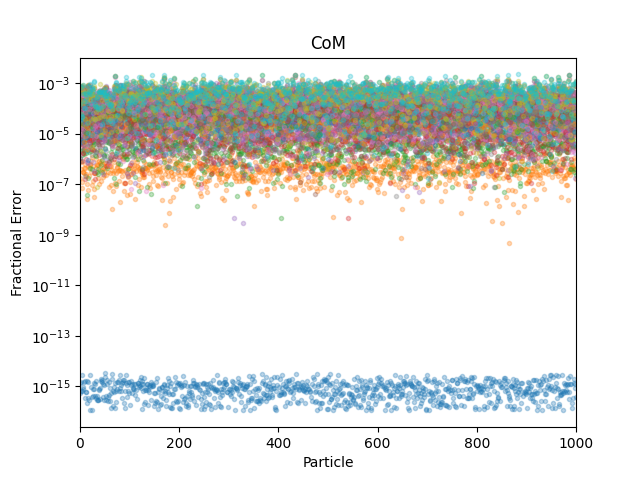

In [13]:
fig, ax = plt.subplots()
for i, theta in enumerate(thetas):
    ax.plot(com_fracs[i], '.', alpha = 0.3, label=str(terms))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.set_title('CoM')

plt.show()

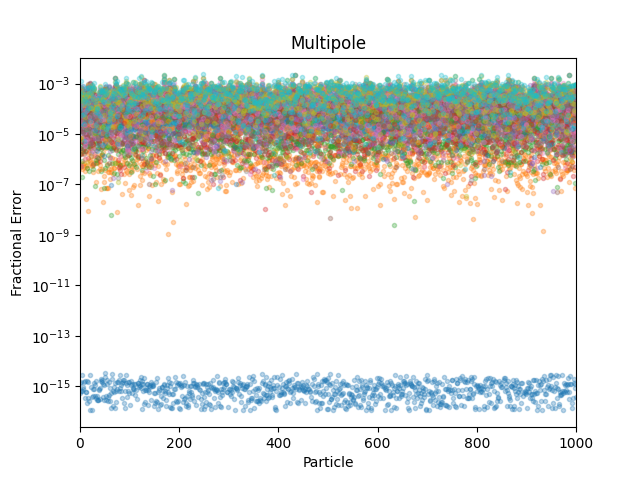

In [14]:
fig, ax = plt.subplots()
for i, theta in enumerate(thetas):
    ax.plot(multi_fracs[i], '.', alpha = 0.3, label=str(terms))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.set_title('Multipole')

plt.show()

In [15]:
com_averages = [np.average(frac) for frac in com_fracs]
com_stdevs = [np.std(frac) for frac in com_fracs]
com_mins = [np.min(frac) for frac in com_fracs]
com_maxs = [np.max(frac) for frac in com_fracs]

multi_averages = [np.average(frac) for frac in multi_fracs]
multi_stdevs = [np.std(frac) for frac in multi_fracs]
multi_mins = [np.min(frac) for frac in multi_fracs]
multi_maxs = [np.max(frac) for frac in multi_fracs]

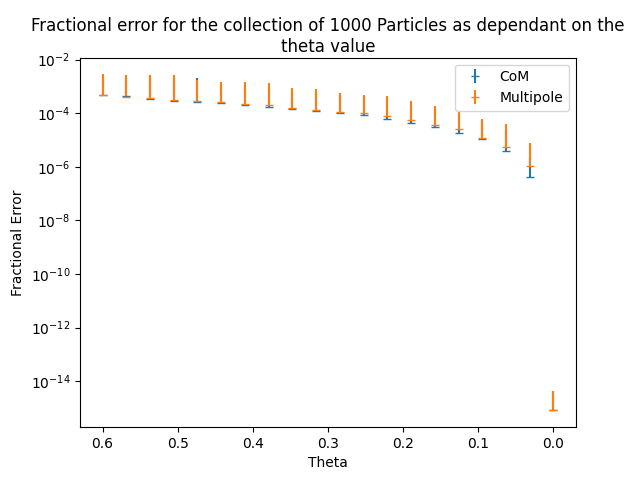

In [16]:
fig, ax = plt.subplots()

ax.set_title(f'Fractional error for the collection of {num_particles} Particles as dependant on the theta value', wrap=True)

ax.invert_xaxis()

ax.errorbar(thetas, com_averages, (com_mins, com_maxs), fmt='_', label='CoM')
ax.errorbar(thetas, multi_averages, (multi_mins, multi_maxs), fmt='_', label='Multipole')

ax.set_yscale('log')

ax.set_xlabel('Theta')
ax.set_ylabel('Fractional Error')

ax.legend()

plt.show()